In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b107e5629e690574e3d7b2b5bf0fde34"
print(url)



http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b107e5629e690574e3d7b2b5bf0fde34


In [2]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=b107e5629e690574e3d7b2b5bf0fde34&q=Boston


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dargaville
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | emba
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | katete
Processing Record 10 of Set 1 | concarneau
Processing Record 11 of Set 1 | taltal
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | salinopolis
Processing Record 14 of Set 1 | esil
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | san quintin
Processing Record 19 of Set 1 | mehamn
Processing Record 20 of Set 1 | shimoda
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Se

Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | nome
Processing Record 39 of Set 4 | chambas
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | jaque
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | odienne
Processing Record 45 of Set 4 | dickson
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 49 of Set 4 | samusu
City not found. Skipping...
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 5 | kedrovyy
Processing Record 3 of Set 5 | aden
Processing Record 4 of Set 5 | wahran
City not found. Skipping...
Processing Record 5 of Set 5 | haileybury
Processing Record 6 of Set 5 | bend
Processing Record 7 of Set 5 | saleaula
City not found. Skip

Processing Record 27 of Set 8 | smithers
Processing Record 28 of Set 8 | inhapim
Processing Record 29 of Set 8 | castle rock
Processing Record 30 of Set 8 | kaitangata
Processing Record 31 of Set 8 | kralendijk
Processing Record 32 of Set 8 | tigil
Processing Record 33 of Set 8 | olafsvik
Processing Record 34 of Set 8 | ola
Processing Record 35 of Set 8 | rocha
Processing Record 36 of Set 8 | marsta
Processing Record 37 of Set 8 | chopda
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | say
Processing Record 40 of Set 8 | dillon
Processing Record 41 of Set 8 | mapiri
Processing Record 42 of Set 8 | zhicheng
Processing Record 43 of Set 8 | marsh harbour
Processing Record 44 of Set 8 | viligili
City not found. Skipping...
Processing Record 45 of Set 8 | maguling
Processing Record 46 of Set 8 | westport
Processing Record 47 of Set 8 | flinders
Processing Record 48 of Set 8 | chute-aux-outardes
Processing Record 49 of Set 8 | hambantota
Processing Record 50 of Se

Processing Record 15 of Set 12 | mayor pablo lagerenza
Processing Record 16 of Set 12 | thunder bay
Processing Record 17 of Set 12 | boyolangu
Processing Record 18 of Set 12 | san salvo
Processing Record 19 of Set 12 | brigantine
Processing Record 20 of Set 12 | kaputa
Processing Record 21 of Set 12 | lovozero
Processing Record 22 of Set 12 | darnah
Processing Record 23 of Set 12 | seoul
Processing Record 24 of Set 12 | talawdi
City not found. Skipping...
Processing Record 25 of Set 12 | oro valley
Processing Record 26 of Set 12 | yithion
City not found. Skipping...
Processing Record 27 of Set 12 | aklavik
Processing Record 28 of Set 12 | buala
Processing Record 29 of Set 12 | the valley
Processing Record 30 of Set 12 | swan hill
Processing Record 31 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 32 of Set 12 | maridi
Processing Record 33 of Set 12 | takoradi
Processing Record 34 of Set 12 | bratslav
Processing Record 35 of Set 12 | teguise
Processing Record 36 of Se

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dargaville,-35.9333,173.8833,59.02,96,100,5.64,NZ,2021-11-04 23:23:30
1,Mataura,-46.1927,168.8643,59.49,41,100,1.68,NZ,2021-11-04 23:23:30
2,Ribeira Grande,38.5167,-28.7000,69.17,89,100,25.01,PT,2021-11-04 23:23:31
3,Busselton,-33.6500,115.3333,56.08,83,73,6.78,AU,2021-11-04 23:23:31
4,Bethel,41.3712,-73.4140,43.66,64,1,3.44,US,2021-11-04 23:21:16
...,...,...,...,...,...,...,...,...,...
550,Avera,33.1940,-82.5271,49.71,72,98,10.36,US,2021-11-04 23:38:24
551,Sao Joao Da Barra,-21.6403,-41.0511,71.47,89,18,7.09,BR,2021-11-04 23:38:24
552,Ko Samui,9.5357,99.9357,81.37,80,100,8.95,TH,2021-11-04 23:38:25
553,Bartlesville,36.7473,-95.9808,57.76,72,20,5.75,US,2021-11-04 23:38:25


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dargaville,NZ,2021-11-04 23:23:30,-35.9333,173.8833,59.02,96,100,5.64
1,Mataura,NZ,2021-11-04 23:23:30,-46.1927,168.8643,59.49,41,100,1.68
2,Ribeira Grande,PT,2021-11-04 23:23:31,38.5167,-28.7000,69.17,89,100,25.01
3,Busselton,AU,2021-11-04 23:23:31,-33.6500,115.3333,56.08,83,73,6.78
4,Bethel,US,2021-11-04 23:21:16,41.3712,-73.4140,43.66,64,1,3.44
...,...,...,...,...,...,...,...,...,...
550,Avera,US,2021-11-04 23:38:24,33.1940,-82.5271,49.71,72,98,10.36
551,Sao Joao Da Barra,BR,2021-11-04 23:38:24,-21.6403,-41.0511,71.47,89,18,7.09
552,Ko Samui,TH,2021-11-04 23:38:25,9.5357,99.9357,81.37,80,100,8.95
553,Bartlesville,US,2021-11-04 23:38:25,36.7473,-95.9808,57.76,72,20,5.75


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

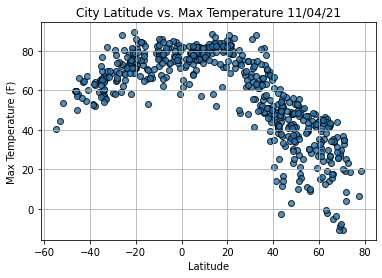

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

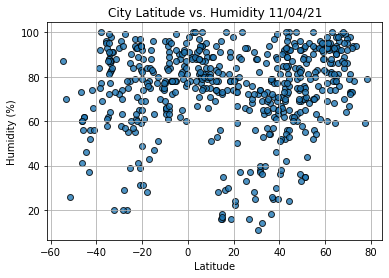

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

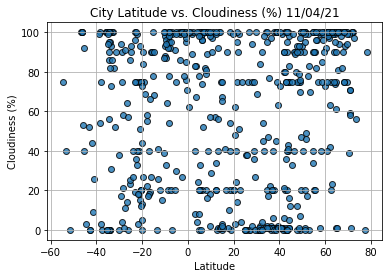

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

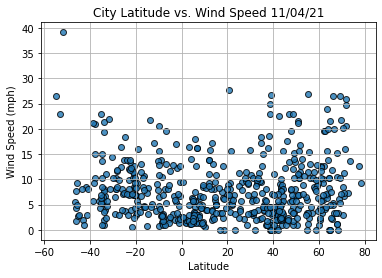

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ribeira Grande,PT,2021-11-04 23:23:31,38.5167,-28.7000,69.17,89,100,25.01
4,Bethel,US,2021-11-04 23:21:16,41.3712,-73.4140,43.66,64,1,3.44
5,Emba,KZ,2021-11-04 23:23:32,48.8264,58.1442,23.04,36,0,6.11
6,Hofn,IS,2021-11-04 23:23:32,64.2539,-15.2082,41.27,59,99,8.30
8,Concarneau,FR,2021-11-04 23:23:33,47.8750,-3.9225,48.97,79,12,7.87


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

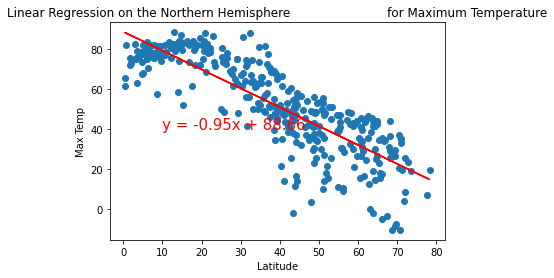

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

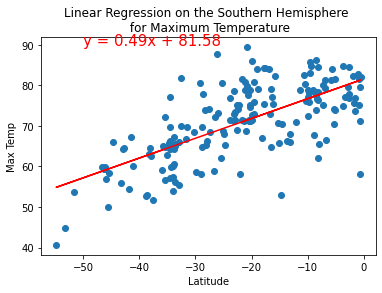

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

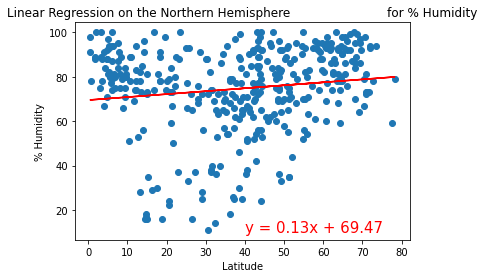

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

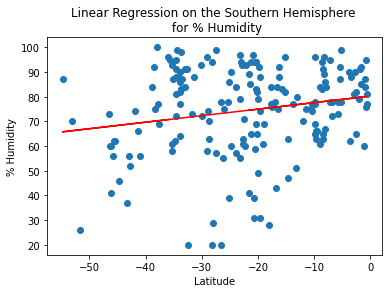

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

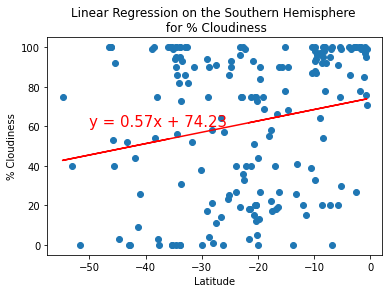

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

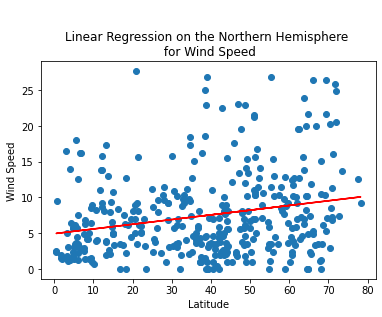

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

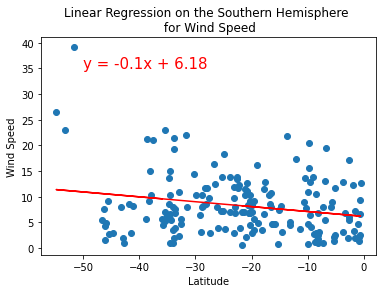

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))